In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("data/ks.csv")

print(data.shape)

data

(378661, 11)


,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,Kitten Mittens - is your cat making too much N...,Knitting,Crafts,NZD,2016-11-23,2016-10-24 21:08:37,suspended,0,NZ,0.00,48.59
378657,TurnAround//The End Needs A Beginning Album Re...,Rock,Music,GBP,2013-05-15,2013-04-15 19:09:37,failed,0,GB,0.00,2501.45
378658,Celtic inspired band looking to move forward w...,Rock,Music,USD,2011-04-29,2011-03-29 03:11:40,failed,0,US,0.00,1500.00
378659,Listening & Speaking in Virtual Reality: 5 Int...,Software,Technology,USD,2014-05-09,2014-04-30 02:45:45,failed,1,US,200.00,67000.00


In [3]:
data.isna().sum()

Название              4
Категория             0
Главная категория     0
Валюта                0
Дедлайн               0
Дата публикации       0
Состояние             0
Инвесторов            0
Страна                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data = data.assign(log_earnings = np.log1p(data["Собрано в долларах"]))
data = data.drop("Собрано в долларах", axis = 1)


data = data.assign(log_dollar_target = np.log1p(data["Цель в долларах"]))
data = data.drop("Цель в долларах", axis = 1)

In [6]:
data

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,log_earnings,log_dollar_target
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,6.398595,6.398595
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,4.276666,9.105091
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,5.889875,7.780207
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,6.220590,9.210440
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,7.789455,7.244942
...,...,...,...,...,...,...,...,...,...,...,...
378656,Kitten Mittens - is your cat making too much N...,Knitting,Crafts,NZD,2016-11-23,2016-10-24 21:08:37,suspended,0,NZ,0.000000,3.903789
378657,TurnAround//The End Needs A Beginning Album Re...,Rock,Music,GBP,2013-05-15,2013-04-15 19:09:37,failed,0,GB,0.000000,7.825026
378658,Celtic inspired band looking to move forward w...,Rock,Music,USD,2011-04-29,2011-03-29 03:11:40,failed,0,US,0.000000,7.313887
378659,Listening & Speaking in Virtual Reality: 5 Int...,Software,Technology,USD,2014-05-09,2014-04-30 02:45:45,failed,1,US,5.303305,11.112463


In [7]:
numeric_columns = data.loc[:, data.dtypes != np.object_].columns

data.describe()

,Инвесторов,log_earnings,log_dollar_target
count,378657.000000,378657.000000,378657.000000
mean,105.618544,5.751708,8.636778
std,907.189767,3.317660,1.691401
min,0.000000,0.000000,0.009950
25%,2.000000,3.465736,7.601402
50%,12.000000,6.438359,8.612685
75%,56.000000,8.306719,9.648660
max,219382.000000,16.828050,18.929673


In [8]:
numeric_columns

Index(['Инвесторов', 'log_earnings', 'log_dollar_target'], dtype='object')

In [9]:
data[numeric_columns].corr()

,Инвесторов,log_earnings,log_dollar_target
Инвесторов,1.000000,0.186145,0.089247
log_earnings,0.186145,1.000000,0.135938
log_dollar_target,0.089247,0.135938,1.000000


In [10]:
categoral_columns = data.loc[:, data.dtypes == np.object_].columns

data.describe(include = "object")

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Страна
count,378657,378657,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,3164,378085,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22313,63584,295362,705,7,197716,292624


In [11]:
data = data.drop("Название", axis = 1)

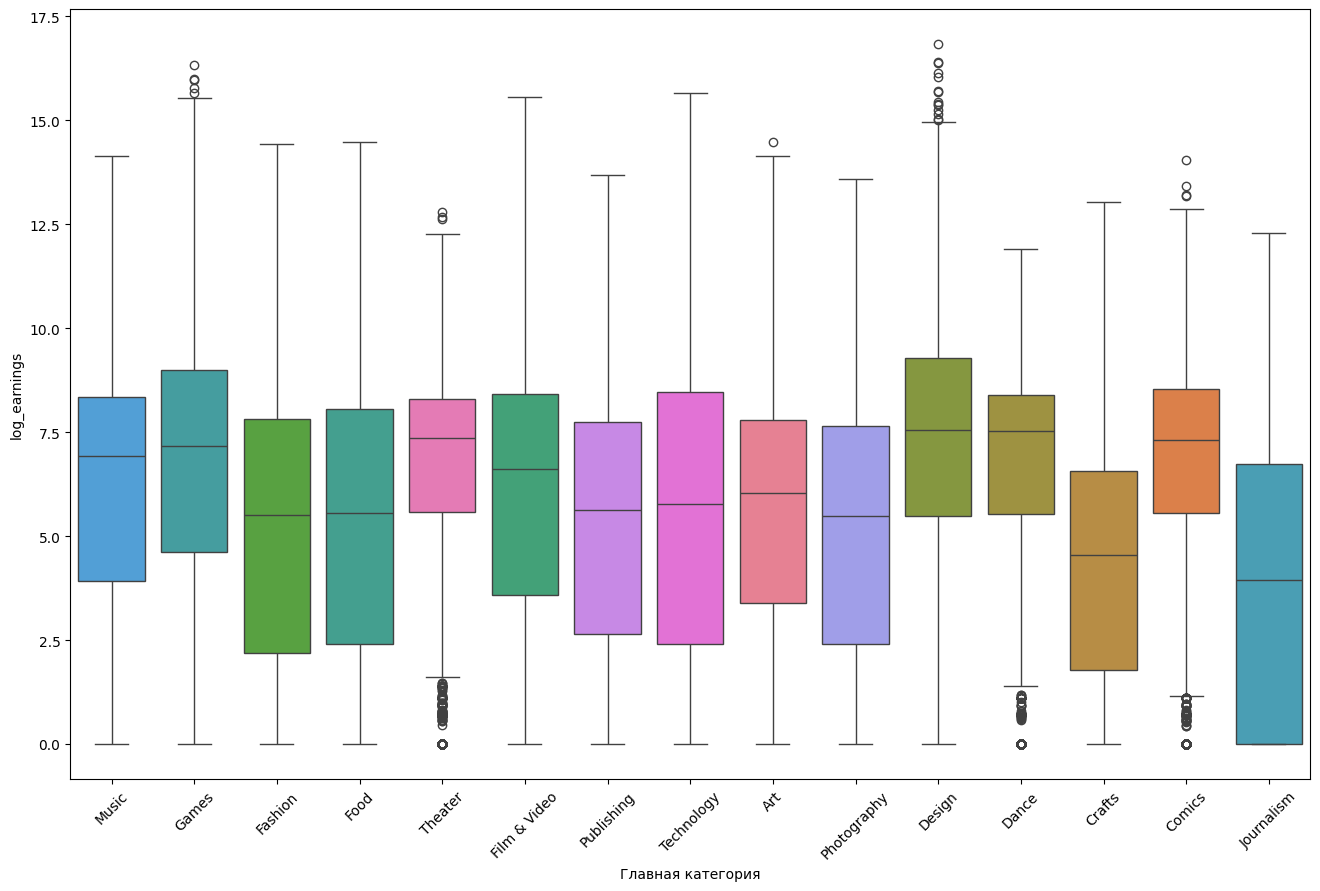

In [12]:
fig = plt.figure(figsize=(16,10))

sns.boxplot(x = data["Главная категория"],
            y = data["log_earnings"],
            data = data,
            hue= data["Главная категория"].astype("category"))
# plt.ylim((0, 50000))
plt.xticks(rotation = 45)
plt.show()

In [13]:
data["Категория"] = data["Категория"].map(data.groupby("Категория")["log_earnings"].mean())

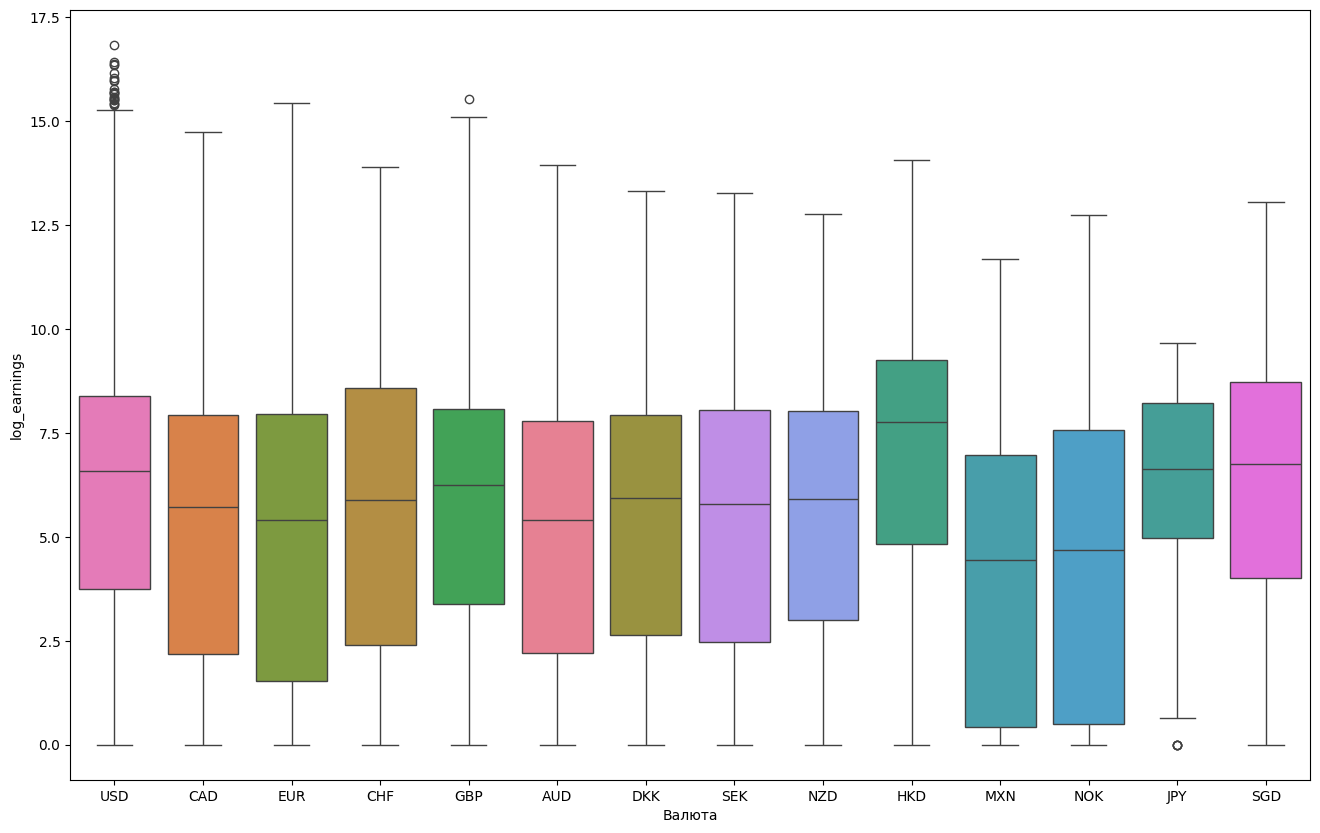

In [14]:
fig = plt.figure(figsize=(16,10))

sns.boxplot(x = data["Валюта"],
            y = data["log_earnings"],
            data = data,
            hue= data["Валюта"].astype("category"))

plt.show()

In [15]:
data["Состояние"].unique()

array(['successful', 'canceled', 'failed', 'undefined', 'live',
       'suspended'], dtype=object)

In [16]:
data = data[data["Состояние"].isin(["failed", "successful"])]

In [17]:
data.loc[:, "Состояние"] = data["Состояние"].apply(lambda x: 0 if x == "failed" else 1).astype(int)


In [18]:
data["Состояние"].unique()

array([1, 0], dtype=object)

In [19]:
data = data.drop("Страна", axis = 1)

data

,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,log_earnings,log_dollar_target
0,5.906915,Music,USD,2013-01-10,2012-12-09 06:03:52,1,23,6.398595,6.398595
3,5.937006,Fashion,USD,2016-11-18,2016-10-19 22:06:41,0,20,6.220590,9.210440
4,5.658130,Food,USD,2015-05-17,2015-04-17 18:10:47,1,62,7.789455,7.244942
5,6.707921,Theater,USD,2013-06-17,2013-05-03 16:17:21,1,86,9.213523,9.210440
6,6.302046,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,0,0.000000,9.210440
...,...,...,...,...,...,...,...,...,...
378655,5.709208,Publishing,USD,2017-04-20,2017-03-21 16:00:45,1,555,9.842091,9.105091
378657,6.078445,Music,GBP,2013-05-15,2013-04-15 19:09:37,0,0,0.000000,7.825026
378658,6.078445,Music,USD,2011-04-29,2011-03-29 03:11:40,0,0,0.000000,7.313887
378659,4.445271,Technology,USD,2014-05-09,2014-04-30 02:45:45,0,1,5.303305,11.112463


In [20]:
data["Дедлайн"] = pd.to_datetime(data["Дедлайн"])
data["Дата публикации"] = pd.to_datetime(data["Дата публикации"])
data["duration"] = (data["Дедлайн"] - data["Дата публикации"]).dt.days.astype(int)

In [21]:
data

,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,log_earnings,log_dollar_target,duration
0,5.906915,Music,USD,2013-01-10,2012-12-09 06:03:52,1,23,6.398595,6.398595,31
3,5.937006,Fashion,USD,2016-11-18,2016-10-19 22:06:41,0,20,6.220590,9.210440,29
4,5.658130,Food,USD,2015-05-17,2015-04-17 18:10:47,1,62,7.789455,7.244942,29
5,6.707921,Theater,USD,2013-06-17,2013-05-03 16:17:21,1,86,9.213523,9.210440,44
6,6.302046,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,0,0.000000,9.210440,29
...,...,...,...,...,...,...,...,...,...,...
378655,5.709208,Publishing,USD,2017-04-20,2017-03-21 16:00:45,1,555,9.842091,9.105091,29
378657,6.078445,Music,GBP,2013-05-15,2013-04-15 19:09:37,0,0,0.000000,7.825026,29
378658,6.078445,Music,USD,2011-04-29,2011-03-29 03:11:40,0,0,0.000000,7.313887,30
378659,4.445271,Technology,USD,2014-05-09,2014-04-30 02:45:45,0,1,5.303305,11.112463,8


In [22]:
data = data.drop(["Дедлайн", "Дата публикации"], axis = 1)

In [23]:
data

,Категория,Главная категория,Валюта,Состояние,Инвесторов,log_earnings,log_dollar_target,duration
0,5.906915,Music,USD,1,23,6.398595,6.398595,31
3,5.937006,Fashion,USD,0,20,6.220590,9.210440,29
4,5.658130,Food,USD,1,62,7.789455,7.244942,29
5,6.707921,Theater,USD,1,86,9.213523,9.210440,44
6,6.302046,Film & Video,USD,0,0,0.000000,9.210440,29
...,...,...,...,...,...,...,...,...
378655,5.709208,Publishing,USD,1,555,9.842091,9.105091,29
378657,6.078445,Music,GBP,0,0,0.000000,7.825026,29
378658,6.078445,Music,USD,0,0,0.000000,7.313887,30
378659,4.445271,Technology,USD,0,1,5.303305,11.112463,8


In [24]:
data = pd.concat([data, pd.get_dummies(data["Главная категория"], drop_first = True).astype(int)], axis = 1)
data = data.drop("Главная категория", axis = 1)
data

,Категория,Валюта,Состояние,Инвесторов,log_earnings,log_dollar_target,duration,Comics,Crafts,Dance,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,5.906915,USD,1,23,6.398595,6.398595,31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.937006,USD,0,20,6.220590,9.210440,29,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5.658130,USD,1,62,7.789455,7.244942,29,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,6.707921,USD,1,86,9.213523,9.210440,44,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,6.302046,USD,0,0,0.000000,9.210440,29,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378655,5.709208,USD,1,555,9.842091,9.105091,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
378657,6.078445,GBP,0,0,0.000000,7.825026,29,0,0,0,...,0,0,0,0,0,1,0,0,0,0
378658,6.078445,USD,0,0,0.000000,7.313887,30,0,0,0,...,0,0,0,0,0,1,0,0,0,0
378659,4.445271,USD,0,1,5.303305,11.112463,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
data = pd.concat([data, pd.get_dummies(data["Валюта"], drop_first = True).astype(int)], axis = 1)
data = data.drop("Валюта", axis = 1)
data

,Категория,Состояние,Инвесторов,log_earnings,log_dollar_target,duration,Comics,Crafts,Dance,Design,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,5.906915,1,23,6.398595,6.398595,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5.937006,0,20,6.220590,9.210440,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.658130,1,62,7.789455,7.244942,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6.707921,1,86,9.213523,9.210440,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,6.302046,0,0,0.000000,9.210440,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378655,5.709208,1,555,9.842091,9.105091,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378657,6.078445,0,0,0.000000,7.825026,29,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
378658,6.078445,0,0,0.000000,7.313887,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378659,4.445271,0,1,5.303305,11.112463,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X = data.drop("log_earnings", axis = 1)
Y = data["log_earnings"]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

selector = KFold(n_splits=5)

model = LinearRegression()


cross_val = cross_val_score(model, X, Y, cv = selector, scoring="neg_mean_squared_error")

mse = -cross_val.mean()

print(f"MSE модели: {mse}")




MSE модели: 4.712142444312051


In [28]:
from sklearn.metrics import r2_score
model.fit(X, Y)

y_pred = model.predict(X)

r2 = r2_score(Y, y_pred)
print(f"R2 модели: {r2}")

R2 модели: 0.5551832764247013
